In this notebook, we show an illustrative example for the calculation of the energies and eigenstates of the system, i.e., Fig. 10 (a,c) of the manuscript.

In [3]:
%load_ext autoreload
%autoreload 1
%aimport resources

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

from resources import Hamiltonian1D, sort_bands, letters_2_binary, solve_resonance

In [11]:
def get_band(x_run, eps1_drive=True):

    if eps1_drive:
        hamiltonian = Hamiltonian1D(N=N, tau=tau, U=U, Vs=Vs, eps=eps_0, states_keep=states_keep)       
        hypermatrix = np.array([hamiltonian(eps=[eps_1, *eps_0[1:]])[:] for eps_1 in x_run])

        xlabel = r'$\varepsilon_1\; [\mu$eV]'
    else:
        hamiltonian = Hamiltonian1D(N=N, tau=tau, U=U, Vs=Vs, eps=eps_0, states_keep=states_keep)       
        hypermatrix = np.array([hamiltonian(eps=[eps_0[0], eps_2, *eps_0[2:]])[:] for eps_2 in x_run])

        xlabel = r'$\varepsilon_2\; [\mu$eV]'

    energies, modes = np.linalg.eigh(hypermatrix)
    energies, modes = sort_bands(energies, modes)
    
    return xlabel, energies, modes

In [12]:
states_keep = ['u000', '0u00', '00u0', '000u']

basis = [r'\uparrow_1', r'\uparrow_2', r'\uparrow_3', r'\uparrow_4']

basis = [r'$|' + base + r'\rangle$' for base in basis]

states_keep = [letters_2_binary(state) for state in states_keep]

In [17]:
N = 4

tau = np.array([5, 5, 5])
U = [0] * 4  # ueV
Vs = [0] * 4

alpha = np.zeros((N, N))  # ueV / mV
alpha[:, 0] = [-85, -36, -12, -7]
alpha[:, 3] = [-7, -12, -32, -81]

eps_0 = np.array([0, 0, 0, 0])  # ueV
V_i = [0, 0, 0, 0]

In [18]:
n_run = 1000
x = np.linspace(-10, 10, n_run)

xlabel, energies, modes = get_band(x, eps1_drive=True)

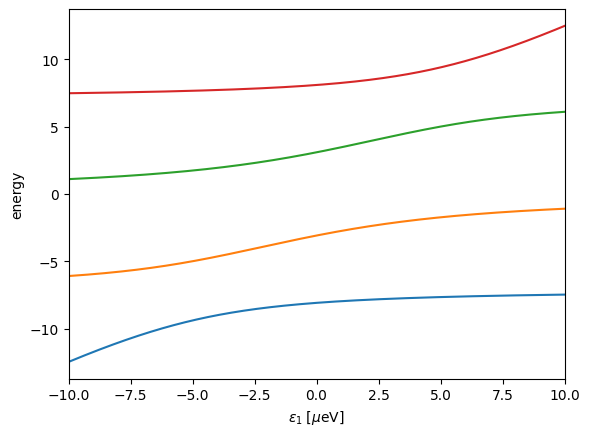

In [19]:
fig, ax = plt.subplots()

n_bands = len(basis)
for i in range(n_bands):
    ax.plot(x, energies[:, i], label=f'{i}')

ax.set_ylabel('energy')

ax.set_xlim(min(x), max(x))
ax.set_xlabel(xlabel);

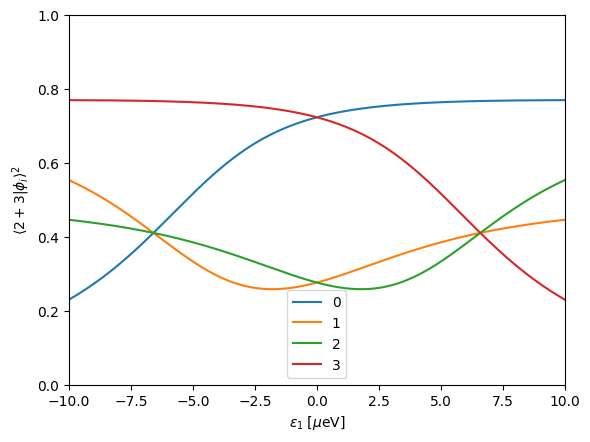

In [20]:
states_index = [1, 2]
fig, ax = plt.subplots(1, 1, sharex=True)

for band_index in range(n_bands):
    population = np.sum([np.abs(modes[:, state_index, band_index]) ** 2 for state_index in states_index], axis=0)
    ax.plot(x, population, label=band_index)

ax.set_ylabel(rf'$\langle 2+3 | \phi_i\rangle^2$')
ax.set_ylim(0, 1)
ax.legend()
ax.set_xlim(min(x), max(x))
ax.set_xlabel(xlabel);